# FEC Dataset

Download data from [https://berkeley-politics-capstone.s3.amazonaws.com/fec.zip](https://berkeley-politics-capstone.s3.amazonaws.com/fec.zip) and place in `"../data/"`

In [9]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
# find the path to each fec file, store paths in a nested dict
fec_2020_paths = {}
base_path = os.path.join("..","data","fec","2020")
for party_dir in os.listdir(base_path):
    if(party_dir[0]!="."):
        fec_2020_paths[party_dir] = {}
        for cand_dir in os.listdir(os.path.join(base_path,party_dir)):
            if(cand_dir[0]!="."):
                fec_2020_paths[party_dir][cand_dir] = {}
                for csv_path in os.listdir(os.path.join(base_path,party_dir,cand_dir)):
                    if(csv_path.find("schedule_a")>=0):
                        fec_2020_paths[party_dir][cand_dir]["donations"] = \
                            os.path.join(base_path,party_dir,cand_dir,csv_path)
                    elif(csv_path.find("schedule_b")>=0):
                        fec_2020_paths[party_dir][cand_dir]["spending"] = \
                            os.path.join(base_path,party_dir,cand_dir,csv_path)
print(json.dumps(fec_2020_paths, indent=4))

{
    "republican": {
        "trump": {
            "spending": "../data/fec/2020/republican/trump/schedule_b-2019-05-30T16_03_37.csv",
            "donations": "../data/fec/2020/republican/trump/schedule_a-2019-05-30T16_03_37.csv"
        }
    },
    "democrat": {
        "williamson": {
            "spending": "../data/fec/2020/democrat/williamson/schedule_b-2019-05-30T20_41_44.csv",
            "donations": "../data/fec/2020/democrat/williamson/schedule_a-2019-05-30T20_41_32.csv"
        },
        "harris": {
            "spending": "../data/fec/2020/democrat/harris/schedule_b-2019-05-30T17_22_09.csv",
            "donations": "../data/fec/2020/democrat/harris/schedule_a-2019-05-30T17_19_58.csv"
        },
        "buttigieg": {
            "donations": "../data/fec/2020/democrat/buttigieg/schedule_a-2019-05-30T17_32_11.csv",
            "spending": "../data/fec/2020/democrat/buttigieg/schedule_b-2019-05-30T17_32_14.csv"
        },
        "klobuchar": {
            "spending": "

Williamson: 84 days of donations averaging $9,397 per day
Harris: 90 days of donations averaging $152,803 per day
Buttigieg: 66 days of donations averaging $75,664 per day
Klobuchar: 18 days of donations averaging $414,983 per day
Yang: 81 days of donations averaging $25,345 per day
Gillibrand: 81 days of donations averaging $187,084 per day
Delaney: 79 days of donations averaging $157,160 per day
Inslee: 41 days of donations averaging $69,060 per day
Hickenlooper: 32 days of donations averaging $77,825 per day
Orourke: 86 days of donations averaging $172,691 per day
Warren: 90 days of donations averaging $152,803 per day
Castro: 88 days of donations averaging $10,401 per day
Sanders: 41 days of donations averaging $200,339 per day
Gabbard: 70 days of donations averaging $71,318 per day
Booker: 90 days of donations averaging $96,948 per day


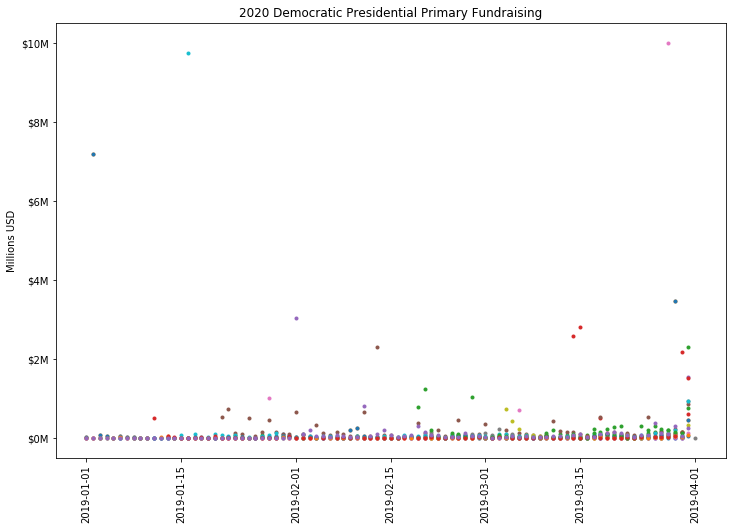

In [4]:
# get data for each 2020 democrat and create a simple plot
fig, ax = plt.subplots(figsize=(12,8))
plot_scale = (10**6,"M","Millions")
for candid in fec_2020_paths["democrat"].keys():
    if("donations" in fec_2020_paths["democrat"][candid].keys()):
        df = pd.read_csv(fec_2020_paths["democrat"][candid]["donations"])
        df["contribution_receipt_date"] = pd.to_datetime(df["contribution_receipt_date"])
        ts = df.groupby(by="contribution_receipt_date")["contribution_receipt_amount"].sum()
        print("{:s}: {:d} days of donations averaging ${:,.0f} per day".format(candid.title(), len(ts), ts.mean()))
        plt.plot(ts/plot_scale[0], ".")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("$%0.0f{:s}".format(plot_scale[1])))
ax.axes.set_ylabel("{:s} USD".format(plot_scale[2]))
plt.xticks(rotation="vertical")
plt.title("2020 Democratic Presidential Primary Fundraising")
plt.show()

Williamson: 84 days of donations averaging $30 per day
Harris: 90 days of donations averaging $243 per day
Buttigieg: 66 days of donations averaging $159 per day
Klobuchar: 18 days of donations averaging $1,229 per day
Yang: 81 days of donations averaging $21 per day
Gillibrand: 81 days of donations averaging $389 per day
Delaney: 79 days of donations averaging $11 per day
Inslee: 41 days of donations averaging $69 per day
Hickenlooper: 32 days of donations averaging $56 per day
Orourke: 86 days of donations averaging $55 per day
Warren: 90 days of donations averaging $243 per day
Castro: 88 days of donations averaging $18 per day
Sanders: 41 days of donations averaging $1,361 per day
Gabbard: 70 days of donations averaging $30 per day
Booker: 90 days of donations averaging $84 per day


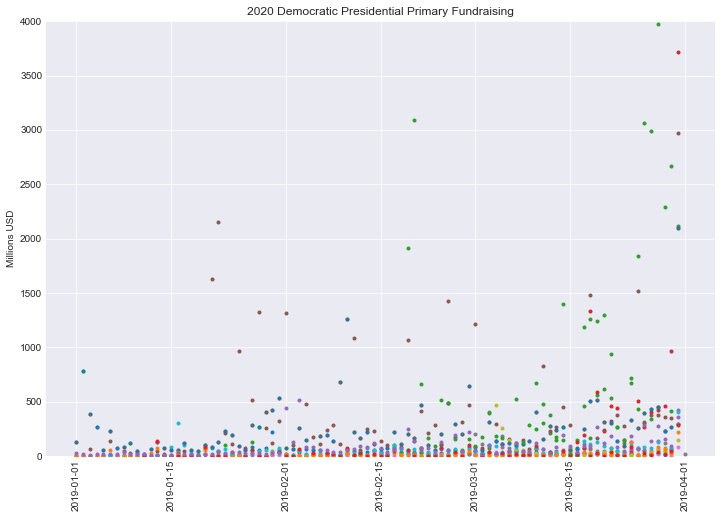

In [10]:
# get data for each 2020 democrat and create a simple plot
fig, ax = plt.subplots(figsize=(12,8))
plot_scale = (1,"","Millions")
for candid in fec_2020_paths["democrat"].keys():
    if("donations" in fec_2020_paths["democrat"][candid].keys()):
        df = pd.read_csv(fec_2020_paths["democrat"][candid]["donations"])
        df["contribution_receipt_date"] = pd.to_datetime(df["contribution_receipt_date"])
        ts = df.groupby(by="contribution_receipt_date")["contribution_receipt_amount"].count()
        print("{:s}: {:d} days of donations averaging ${:,.0f} per day".format(candid.title(), len(ts), ts.mean()))
        plt.plot(ts/plot_scale[0], ".")
plt.ylim(0,4000)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0f{:s}".format(plot_scale[1])))
ax.axes.set_ylabel("{:s} USD".format(plot_scale[2]))
plt.xticks(rotation="vertical")
plt.title("2020 Democratic Presidential Primary Fundraising")
plt.show()